## Cost benefit analysis

In [31]:
const = 1.0
hourly_pay = 12.0
minimum_production = 400

In [32]:
def production(hours_worked, num_employees):
    productivity = const * (1.0 - 0.01 * (hours_worked-40))
    return num_employees * hours_worked * productivity

def cost(hours_worked_pt, num_employees_pt, hours_worked_ft, num_employees_ft):
    part_time_labor_cost = hours_worked_pt * hourly_pay * num_employees_pt
    part_time_fixed_cost = 20*num_employees_pt
    full_time_labor_cost = hours_worked_ft * num_employees_ft * hourly_pay
    full_time_fixed_cost = 100*num_employees_ft
    return  (part_time_labor_cost
             + part_time_fixed_cost
             + full_time_labor_cost
             + full_time_fixed_cost)

In [33]:
cons = ({'type': 'ineq', 'fun': lambda x:  production(x[0], x[1]) + production(x[2],x[3]) - minimum_production},
        {'type': 'ineq', 'fun': lambda x:  x[0]},
        {'type': 'ineq', 'fun': lambda x:  x[1]},
        {'type': 'ineq', 'fun': lambda x:  29-x[0]}, # <= 29
        {'type': 'ineq', 'fun': lambda x:  x[2] - 30}, # >= 30
        {'type': 'ineq', 'fun': lambda x:  x[3]},
        )

In [34]:
from scipy.optimize import minimize

print(minimize(lambda x: cost(x[0], x[1], x[2], x[3]), [40.0, 10.0, 29, 0],
                             method = 'COBYLA',
                             constraints = cons,
                             options={'maxiter': 5000}))

  status: 1
    nfev: 1266
   maxcv: 1.1797965271398425e-08
 success: True
     fun: 4262.8199690958918
       x: array([  1.37015839e+01,   2.31148625e+01,   3.01668743e+01,
        -4.30657066e-25])
 message: 'Optimization terminated successfully.'


## Solving a linear program

In [19]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cvxopt import matrix, solvers

In [20]:
A = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
b = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
sol = solvers.lp(c,A,b)
print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.
[ 5.00e-01]
[ 1.50e+00]



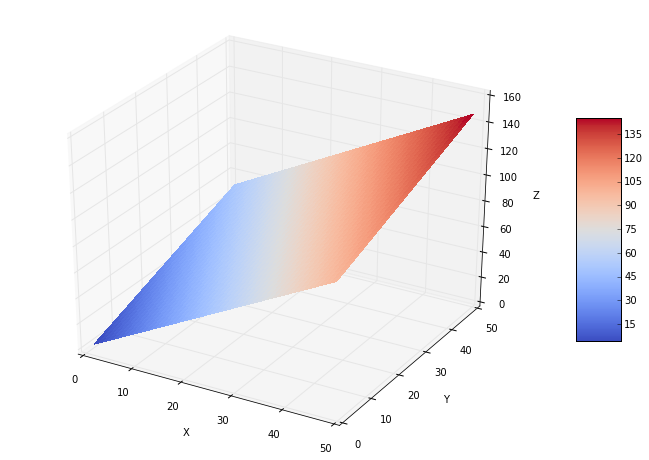

In [30]:
pd.set_option('html',False)
pd.set_option('max_columns',30)
pd.set_option('max_rows',10)


# What follows is a copy of the 3D plot example code.
# Data is randomly generated so there is no external data import.

def objective_function(x1,x2):
    return 2*x1 + x2

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x1 = np.arange(1,50,1)
x2 = np.arange(1,50,1)
x1, x2 = np.meshgrid(x1, x2)

surf = ax.plot_surface(x1, x2, objective_function(x1, x2), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Solving a quadratic program

In [27]:
from cvxopt import matrix, solvers
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)
print(sol['x'])
print(sol['y'])

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]

[-2.75e+00]



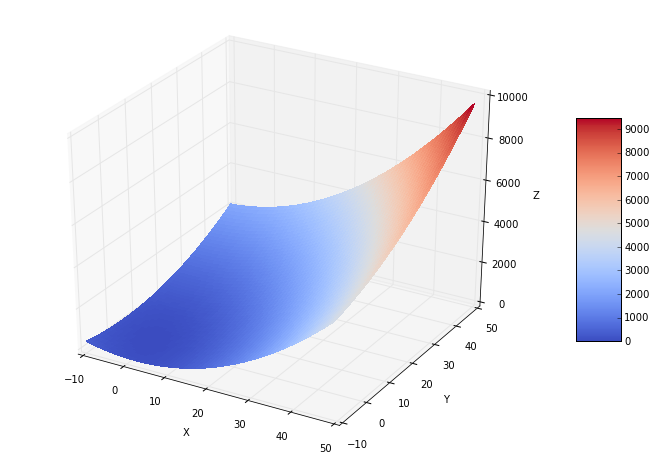

In [29]:
pd.set_option('html',False)
pd.set_option('max_columns',30)
pd.set_option('max_rows',10)


# What follows is a copy of the 3D plot example code.
# Data is randomly generated so there is no external data import.

def objective_function(x1,x2):
    return 2*x1**2 + x2**2 + x1*x2 + x1 +x2

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x1 = np.arange(-10,50,1)
x2 = np.arange(-10,50,1)
x1, x2 = np.meshgrid(x1, x2)

surf = ax.plot_surface(x1, x2, objective_function(x1, x2), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()